<a href="https://colab.research.google.com/github/aritraghsh09/GaMPEN/blob/master/tutorials/Making_predictions_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making Predictions with GaMPEN

In this Jupyter Notebook, we will demonstrate how trained GaMPEN models can be used to make predictions on galaxy images. For an extensive documentation on GaMPEN, please refer to https://gampen.readthedocs.io/en/latest/index.html

This tutorial has been developed by [Aritra Ghosh](http://ghosharitra.com) and [Aayush Mishra](https://github.com/aayush2505).

## Preliminary stuff

### Connect to GPU runtime

Before we dive in, note that Google Colab gives you the ability to use GPUs for this tutorial.  

To do this, on the Google Colab menu bar select "Runtime" -> "Change runtime type" -> "Hardware accelerator" -> "GPU".

### Installing GaMPEN

First, let's install GaMPEN. 

Some of these commands are specifically for Google Colab. If doing this on your own machine, please follow the steps outlined [here](https://gampen.readthedocs.io/en/latest/Getting_Started.html)

In [ ]:
!git clone https://github.com/aritraghsh09/GaMPEN.git

Cloning into 'GaMPEN'...
remote: Enumerating objects: 2145, done.
remote: Counting objects: 100% (493/493), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 2145 (delta 302), reused 456 (delta 278), pack-reused 1652
Receiving objects: 100% (2145/2145), 16.40 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (1390/1390), done.


In [ ]:
%cd /content/GaMPEN/

!pip install -r requirements.txt 

/content/GaMPEN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/GaMPEN (from -r requirements.txt (line 2))
  Cloning https://github.com/adambielski/GrouPy (to revision e9c2e5ae8f2234359a9f68b52d9d430d9a72f4d7) to /tmp/pip-install-a5qen1g7/groupy_f2ea7afb600d4fdaa40ae009a1d4a592
  Running command git clone -q https://github.com/adambielski/GrouPy /tmp/pip-install-a5qen1g7/groupy_f2ea7afb600d4fdaa40ae009a1d4a592
  Running command git rev-parse -q --verify 'sha^e9c2e5ae8f2234359a9f68b52d9d430d9a72f4d7'
  Running command git fetch -q https://github.com/adambielski/GrouPy e9c2e5ae8f2234359a9f68b52d9d430d9a72f4d7
     |████████████████████████████████| 1.1 MB 5.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.5 MB 23.8 MB/s 
     |████████████████████████████████| 121 kB 43.9 MB/s 
     |███

### Checking the Installation

In order to check whether the installation has occured succesfully, run the command below.  

In [ ]:
!make check

flake8 --ignore=E203,W503 ggt
pytest
============================= test session starts ==============================
platform linux -- Python 3.8.16, pytest-6.0.1, py-1.9.0, pluggy-0.13.1
rootdir: /content/GaMPEN
plugins: typeguard-2.7.1
collected 7 items                                                              

ggt/tests/test_install.py .                                              [ 14%]
ggt/tests/test_metrics.py .                                              [ 28%]
ggt/tests/test_models.py ...s                                            [ 85%]
ggt/tests/test_utils.py .                                                [100%]

======================== 6 passed, 1 skipped in 10.98s =========================


As long as the tests do not produce any errors, you are good to go! 

Note that warnings and and tests being skipped are ok! 

## Getting Images & Models to Perform Prediction

### Downloading Images and Creating the Necessary Folder Structure

Let's get some Hyper Suprime Cam images from its 2nd Public Data Release that we can use to perform predictions. For this demo, we will use the images from Fig. 13 of [Ghosh et. al. 2022](https://arxiv.org/pdf/2212.00051.pdf)

**⚠ NOTE:** In order for GaMPEN to work, you need to point it to a `/data/` folder which has all the key components it needs (this folder doesn't necessarily need to be name).  In the data folder, at the very least, you should have 
  * a `/cutouts/` folder with all the images on which you want to perform analysis
  * an `info.csv` file with file names of the various images.

In [ ]:
# Let's create two data-directories in our Colab runtime
# One containing low-z images and one containing mid-z images. 
%cd /content/
!mkdir data_lowz
!mkdir data_lowz/cutouts/
!mkdir data_midz
!mkdir data_midz/cutouts/

/content


In [ ]:
#Now let's get some contents for these folders from the Yale FTP Servers

%cd /content/data_lowz/
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_preds/data_lowz/info.csv 

%cd /content/data_lowz/cutouts/
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_preds/data_lowz/cutouts/*.fits

%cd /content/data_midz/
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_preds/data_midz/info.csv 

%cd /content/data_midz/cutouts/
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_preds/data_midz/cutouts/*.fits

/content/data_lowz
--2022-12-15 06:02:42--  ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_preds/data_lowz/info.csv
           => ‘info.csv’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.astro.yale.edu (ftp.astro.yale.edu)|128.36.139.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/hsc_morph/gampen_tutorial_files/for_preds/data_lowz ... done.
==> SIZE info.csv ... 102
==> PASV ... done.    ==> RETR info.csv ... done.
Length: 102 (unauthoritative)

info.csv            100%[===================>]     102  --.-KB/s    in 0s      

2022-12-15 06:02:43 (9.74 MB/s) - ‘info.csv’ saved [102]

/content/data_lowz/cutouts
--2022-12-15 06:02:43--  ftp://ftp.astro.yale.edu/pub/hsc_morph/gampen_tutorial_files/for_preds/data_lowz/cutouts/*.fits
           => ‘.listing’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.astr

### Downloading the Trained Models

Now, let's download the models we trained on Hyper Suprime Cam Imaging in [Ghosh et. al. 2022](https://arxiv.org/pdf/2212.00051.pdf). Since our images are from the low and mid redshift bins, we download the corresponding trained models. 

In [ ]:
%cd /content/
%mkdir trained_models
%cd trained_models

!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/g_0_025/trained_model/g_0_025_real_data.pt
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/r_025_050/trained_model/r_025_050_real_data.pt

/content
/content/trained_models
--2022-12-15 06:02:49--  ftp://ftp.astro.yale.edu/pub/hsc_morph/g_0_025/trained_model/g_0_025_real_data.pt
           => ‘g_0_025_real_data.pt’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.astro.yale.edu (ftp.astro.yale.edu)|128.36.139.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/hsc_morph/g_0_025/trained_model ... done.
==> SIZE g_0_025_real_data.pt ... 572517399
==> PASV ... done.    ==> RETR g_0_025_real_data.pt ... done.
Length: 572517399 (546M) (unauthoritative)

g_0_025_real_data.p 100%[===================>] 546.00M  38.5MB/s    in 15s     

2022-12-15 06:03:05 (36.8 MB/s) - ‘g_0_025_real_data.pt’ saved [572517399]

--2022-12-15 06:03:05--  ftp://ftp.astro.yale.edu/pub/hsc_morph/r_025_050/trained_model/r_025_050_real_data.pt
           => ‘r_025_050_real_data.pt’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 

**⚠ NOTE:** Details about all the publicly-available GaMPEN models as well as the morphological catalogs for all galaxies in [Ghosh et. al. 2022](https://arxiv.org/pdf/2212.00051.pdf) can be found in our [Public Data Release Handbook](https://gampen.readthedocs.io/en/latest/Public_data.html)

### Inspecting the Files


Now, let's take a quick look at the downloaded info.csv files.

In [ ]:
import pandas as pd

info_lowz = pd.read_csv("/content/data_lowz/info.csv")
info_midz = pd.read_csv("/content/data_midz/info.csv")

In [ ]:
info_lowz

,object_id,file_name
0,45849776612206843,45849776612206843.fits
1,71112151477012948,71112151477012948.fits


In [ ]:
info_midz

,object_id,file_name
0,38544642832100143,38544642832100143.fits
1,40163802552993641,40163802552993641.fits


As outlined before, the only mandatory coulmn in the info.csv file is a column called `file_name` with the full name of each image file in the `/cutouts/` folder.


Now, let's take a quick look at the images. Note that HSC's cutout tool sometimes returns images with slightly different cutout-sizes (in terms of pixels). Thus, if you are using our models for performing inference, we recommend downloading cutouts that are at least 250x250 pixels. Then, using the correct options in GaMPEN, these will be cropped automatically while performing inference. 

Our pre-trained models accept the following sizes as input sizes for their images:-

* Low-z: $239 \times 239$ pixels
* Mid-z: $143 \times 143$ pixels
* High-z: $96 \times 96$ pixels

Inspite of the fact the GaMPEN automatically crops galaxies, we still start out with different sizes for each redshift bin as training & inference time goes down drastically with reduction in image size. Thus, it makes no senese to start with the same sizes for the low- and high-z bins. Each size above is chosen such that most galaxies at these redshifts will have $10 \times R_e < $ cutout size. 

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 6.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.1
    Uninstalling matplotlib-3.3.1:
      Successfully uninstalled matplotlib-3.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch 1.6.0 which is incompatible.
fastai 2.7.10 requires torchvision>=0.8.2, but you have torchvision 0.7.0 which is incompatible.


In [ ]:
import pylab as plt
import matplotlib as mpl
from astropy.io import fits

LOGMIN = 1e-3

#Defining a function to crop images
def crop_center(img, cropx, cropy):
    
    #Function from 
    #https://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image
    
    y, x, *_ = img.shape
    startx = x // 2 - (cropx // 2)
    starty = y // 2 - (cropy // 2)    
    return img[starty:starty + cropy, startx:startx + cropx, ...]

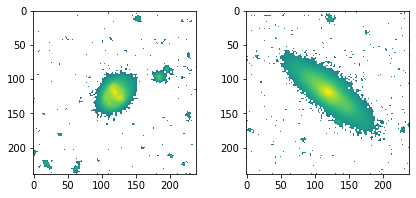

In [ ]:
#Low-z Data
fig, ax = plt.subplots(1,2,figsize=(7,3))

for i,img_num in enumerate([45849776612206843, 71112151477012948]):
  img_data = fits.getdata('/content/data_lowz/cutouts/' + str(img_num) + '.fits')

  #Now, let's crop the image to it's starting size
  img_data = crop_center(img_data, 239, 239)

  ax[i].imshow(img_data,norm=mpl.colors.LogNorm(vmin=max(img_data.min(),LOGMIN)))

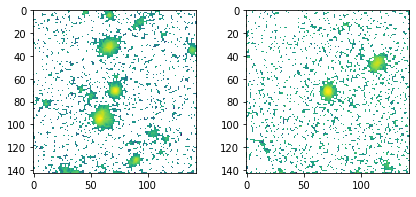

In [ ]:
#Mid-z Data
fig, ax = plt.subplots(1,2,figsize=(7,3))

for i,img_num in enumerate([38544642832100143, 40163802552993641]):
  img_data = fits.getdata('/content/data_midz/cutouts/' + str(img_num) + '.fits')

  #Now, let's crop the image to it's starting size
  img_data = crop_center(img_data, 143, 143)

  ax[i].imshow(img_data,norm=mpl.colors.LogNorm(vmin=max(img_data.min(),LOGMIN)))

## Running the Inference module

Now using the downloaded models and images, let's perform inference.

### Low-z

First, let's use the lowz model to perform inference on the lowz images.

For performing inference, first we need to create a directory to store the output files. Let's call this directory `bayesian_inference_runs`.

Additionally since we will be using models that have already been trained, we will be making predictions for the following three variables:-

$$ \left( \log\frac{L_B/L_T}{1-L_B/L_T}, \log R_e, \log \mathrm{Flux} \right) $$

The variables were additionally standard-scaled (i.e., mean subtracted and variance set to 1) during training (for more details see Section 4.1 of [Ghosh et. al. 2022](https://arxiv.org/pdf/2212.00051.pdf)). Now, in order to perform the inverse scaling properly, we need access to the different training values of these variables that were used to perform the forward scaling.

We make a separate directory called `scaling_data_lowz` and `scaling_data_midz` to place the relevant `info.csv` and `/splits/` files from the Yale FTP Servers. These were the files used for training and will help us unscale the predicted values back to ($L_B/L_T$,$R_e$, Flux). You should use the same options for these options if you are using our pre-trained models (as well as the corresponding options for the mid and high-z models)

In [ ]:
%cd /content/
%mkdir bayesian_inference_runs_lowz
%mkdir scaling_data_dir_lowz
%mkdir scaling_data_dir_lowz/splits/

%cd /content/scaling_data_dir_lowz/
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/g_0_025/scaling_data_dir/info.csv

%cd /content/scaling_data_dir_lowz/splits/
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/g_0_025/scaling_data_dir/splits/*.csv

/content
/content/scaling_data_dir_lowz
--2022-12-15 06:03:32--  ftp://ftp.astro.yale.edu/pub/hsc_morph/g_0_025/scaling_data_dir/info.csv
           => ‘info.csv’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.astro.yale.edu (ftp.astro.yale.edu)|128.36.139.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/hsc_morph/g_0_025/scaling_data_dir ... done.
==> SIZE info.csv ... 7682214
==> PASV ... done.    ==> RETR info.csv ... done.
Length: 7682214 (7.3M) (unauthoritative)

info.csv            100%[===================>]   7.33M  10.9MB/s    in 0.7s    

2022-12-15 06:03:33 (10.9 MB/s) - ‘info.csv’ saved [7682214]

/content/scaling_data_dir_lowz/splits
--2022-12-15 06:03:34--  ftp://ftp.astro.yale.edu/pub/hsc_morph/g_0_025/scaling_data_dir/splits/*.csv
           => ‘.listing’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.astro.

The backbone of performing inference is the `inference.py` file at `/GaMPEN/ggt/modules/`.

In order to use this file, we run it by passing different variables to the inferece file. In order to understand the various options that can be specified while running inference you can type `!python GaMPEN/ggt/modules/inference.py --help` in a Google Colab code cell or consult the documentation [here](https://gampen.readthedocs.io/en/latest/Using_GaMPEN.html#inference). 

****⚠ STOP: We strongly recommend that you go through the page linked above to understand the various options we have used for performing inference below.**. 

Since the data we are using for inference doesn't have any ground-truth data available, we set `split` and `slug` to `None` and pass the `--no-labels` option to specify that we don't have any labels available for these images. 

In order to unscale the predictions back, we specify the path to the appropriate `scaling_data_dir` that we created in the previous step. We specify the `scaling_slug` as `balanced-dev2` since this was the option that was used for the pre-trained model and the scaling file we are using is named `balanced-dev2-train.csv`. All that is done using this file is that the full range of values for the prediction columns specified are read in --> their mean and standard deviation is determined --> and this is then used for unscaling the predicted values. If you are using your own trained models, you should of course point this to the relevant file in `/splits/` in your trainin data directory. 

The `--mc-dropout` and `--cov-errors` options specify that we want to perform both Monte Carlo dropout during inference as well include aleatoric errors in each of the Monte Carlo runs. The `n_runs` parameter controls the number of different Monte Carlo models generated for prediction. For a robust analysis, we recommend setting this to `500` or `1000`. We set this to `50` here just for demonstrative purposes. 



In [ ]:
%cd /content/

!python GaMPEN/ggt/modules/inference.py\
  --model_path='trained_models/g_0_025_real_data.pt'\
  --output_path="bayesian_inference_runs_lowz/"\
  --data_dir='data_lowz/'\
  --split=None\
  --slug=None\
  --cutout_size=239\
  --normalize\
  --transform\
  --n_workers=2\
  --parallel\
  --label_cols='custom_logit_bt,ln_R_e_asec,ln_total_flux_adus'\
  --model_type='vgg16_w_stn_oc_drp'\
  --repeat_dims\
  --channels=3\
  --label_scaling='std'\
  --mc_dropout\
  --cov_errors\
  --dropout_rate=0.0004\
  --n_runs=50\
  --no-labels\
  --scaling_data_dir='scaling_data_dir_lowz/'\
  --scaling_slug='balanced-dev2'


/content
[2022-12-15 06:03:41,780] Performing pure inference without labels. Using
            column names to infer number of expected outputs.
            Split and Slug values entered will be ignored and
            info.csv will be used.
[2022-12-15 06:03:41,780] Loading images to device...
[2022-12-15 06:03:41,785] Generating PyTorch tensors from FITS files...
100% 2/2 [00:00<00:00, 45.21it/s]
[2022-12-15 06:03:41,832] Preloading 2 tensors...
100% 2/2 [00:00<00:00, 147.91it/s]
[2022-12-15 06:03:41,923] Running inference run 1
[2022-12-15 06:03:41,940] No GPU found; falling back to CPU
[2022-12-15 06:03:41,941] Using dropout rate of 0.0004 in the model
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:14<00:00, 37.0MB/s]
[2022-12-15 06:04:01,065] Loading model...
[2022-12-15 06:04:01,556] Performing predictions...
[2022-12-15 06:04:01,556] Activating Monte Carlo dropout...
100% 1/1 [00:0

Note that output `.csv` files are stored in the output directory we specified. As many `.csv` files are created as the number of runs specified in `n_runs` and are named `inf_xx.csv`. Each file corresponds to the values predicted using a different model created using Monte Carlo Dropout. Each file will contain one sampled value from the predicted distribution by that model.

Let's take a look at `inf_1.csv`

In [ ]:
import pandas as pd

inf_1 = pd.read_csv('/content/bayesian_inference_runs_lowz/inf_1.csv')
inf_1

,object_id,file_name,preds_custom_logit_bt,preds_ln_R_e_asec,preds_ln_total_flux_adus
0,45849776612206843,45849776612206843.fits,-1.116584,0.615151,8.055857
1,71112151477012948,71112151477012948.fits,1.144712,1.037505,9.459242


As expected we have the predicted values for each columns specified during inference. Note that these have already been un-scaled in terms of the the minmax/standard scaling specified. However, they are still in the format 

$$ \left( \log\frac{L_B/L_T}{1-L_B/L_T}, \log R_e, \log \mathrm{Flux} \right) $$


Now, we will use the [`result_aggregator.py`](https://github.com/aritraghsh09/GaMPEN/blob/master/ggt/modules/result_aggregator.py) file in GaMPEN to collate all these .csvs. The `result_aggregator` module of GaMPEN will collect all the csvs; scale the values back to $L_B/L_T$, $R_e$, Flux; produce summary statistics; as well as produce PDFs of the output variables for each image. 

**For an understanding of all the options available in the `result_aggregator` module, please refere to [this page.](https://gampen.readthedocs.io/en/latest/Using_GaMPEN.html#result-aggregator)**

The `data_dir` must point to the directory with the output csvs and the `out_summary_df_path` to the location you want the summary data-frame to be stored. 

The `unscale` option here specifies that we want to perform the inverse logit and logarithmic scalings. The `scaling_data_dir` should again point to the scaling files used during training (see previous discussion).

In [ ]:
%cd /content/
%mkdir lowz_pdfs

!python /content/GaMPEN/ggt/modules/result_aggregator.py\
    --data_dir="bayesian_inference_runs_lowz/"\
    --num=50\
    --out_summary_df_path="bayesian_inference_runs_lowz/summary.csv"\
    --out_pdfs_path="lowz_pdfs/"\
    --unscale\
    --scaling_df_path="scaling_data_dir_lowz/info.csv"\
    --drop_old

/content
Loading Files.....
100% 50/50 [00:09<00:00,  5.21it/s]
Creating Data Array
100% 50/50 [00:00<00:00, 329.33it/s]
Calculating Conf Ints for preds_R_e_asec
100% 2/2 [00:00<00:00, 18.73it/s]
Calculating Conf Ints for preds_total_flux_adus
100% 2/2 [00:00<00:00, 35.21it/s]
Calculating Conf Ints for preds_bt
100% 2/2 [00:00<00:00, 37.21it/s]
Calculating Conf Ints for preds_total_mag
100% 2/2 [00:00<00:00, 34.40it/s]
Saving PDFs as Arrays
100% 2/2 [00:00<00:00, 136.38it/s]


Now, let's inspect the `summary.csv` file as well as the predicted PDFs. 


In [ ]:
import pandas as pd

summary_lowz = pd.read_csv('/content/bayesian_inference_runs_lowz/summary.csv')
summary_lowz

,object_id,file_name,preds_R_e_asec_mean,preds_R_e_asec_median,preds_R_e_asec_std,preds_R_e_asec_skew,preds_R_e_asec_kurtosis,preds_R_e_asec_mode,preds_R_e_asec_sig_ci,preds_R_e_asec_twosig_ci,...,preds_bt_threesig_ci,preds_total_mag_mean,preds_total_mag_median,preds_total_mag_std,preds_total_mag_skew,preds_total_mag_kurtosis,preds_total_mag_mode,preds_total_mag_sig_ci,preds_total_mag_twosig_ci,preds_total_mag_threesig_ci
0,45849776612206843,45849776612206843.fits,1.820383,1.817087,0.033035,0.088111,0.364540,1.819898,"(1.7849062023871562, 1.8548905780783351)","(1.7437085033965363, 1.896088277068955)",...,"(0.017120892971267457, 0.6071860425100599)",18.330711,18.317148,0.078251,0.518924,0.128911,18.291817,"(18.203980020792837, 18.379654918407713)","(18.160436670101973, 18.494519274540515)","(18.160436670101973, 18.535435009241414)"
1,71112151477012948,71112151477012948.fits,2.651862,2.660352,0.099627,-0.231496,-0.112394,2.655467,"(2.5474644276399103, 2.7634696637768608)","(2.446881836766979, 2.8417921730631597)",...,"(0.24711985189174737, 0.7585437171245606)",16.795830,16.803533,0.093847,-0.397087,-0.410068,16.847730,"(16.73570179486509, 16.959757791182813)","(16.60634116302882, 16.989350092583265)","(16.5670256768825, 16.989350092583265)"


In [ ]:
print(summary_lowz.columns)

Index(['object_id', 'file_name', 'preds_R_e_asec_mean',
       'preds_R_e_asec_median', 'preds_R_e_asec_std', 'preds_R_e_asec_skew',
       'preds_R_e_asec_kurtosis', 'preds_R_e_asec_mode',
       'preds_R_e_asec_sig_ci', 'preds_R_e_asec_twosig_ci',
       'preds_R_e_asec_threesig_ci', 'preds_total_flux_adus_mean',
       'preds_total_flux_adus_median', 'preds_total_flux_adus_std',
       'preds_total_flux_adus_skew', 'preds_total_flux_adus_kurtosis',
       'preds_total_flux_adus_mode', 'preds_total_flux_adus_sig_ci',
       'preds_total_flux_adus_twosig_ci', 'preds_total_flux_adus_threesig_ci',
       'preds_bt_mean', 'preds_bt_median', 'preds_bt_std', 'preds_bt_skew',
       'preds_bt_kurtosis', 'preds_bt_mode', 'preds_bt_sig_ci',
       'preds_bt_twosig_ci', 'preds_bt_threesig_ci', 'preds_total_mag_mean',
       'preds_total_mag_median', 'preds_total_mag_std', 'preds_total_mag_skew',
       'preds_total_mag_kurtosis', 'preds_total_mag_mode',
       'preds_total_mag_sig_ci', 'preds_

As can be seen in the summary file, for every prediction column we have the 

  * mean (_mean)
  * median (_median)
  * mode (_mode)
  * standard deviation (_std)
  * skewness (_skew)
  * kurtosis (_kurt)
  * $1\sigma$ confidence interval (_sig_ci)
  * $2\sigma$ confidence interval (_twosig_ci)
  * $3\sigma$ confidence interval (_threesig_ci)

for the predicted distribution. 

**⚠ STOP: Note that the `result_aggregator` module also converts flux to magnitudes; however this coversion assumes a photometric zeropoint that is only true for HSC. If you are using the `result_aggregator` module for some other survey, you should change this.**


### Mid-z

Now, let's repeat the same as above, but now using midz model on the midz images.

In [ ]:
%cd /content/
%mkdir bayesian_inference_runs_midz
%mkdir scaling_data_dir_midz
%mkdir scaling_data_dir_midz/splits/

%cd /content/scaling_data_dir_midz/
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/r_025_050/scaling_data_dir/info.csv

%cd /content/scaling_data_dir_midz/splits/
!wget ftp://ftp.astro.yale.edu/pub/hsc_morph/r_025_050/scaling_data_dir/splits/*.csv

/content
/content/scaling_data_dir_midz
--2022-12-15 06:08:34--  ftp://ftp.astro.yale.edu/pub/hsc_morph/r_025_050/scaling_data_dir/info.csv
           => ‘info.csv’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.astro.yale.edu (ftp.astro.yale.edu)|128.36.139.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/hsc_morph/r_025_050/scaling_data_dir ... done.
==> SIZE info.csv ... 7227931
==> PASV ... done.    ==> RETR info.csv ... done.
Length: 7227931 (6.9M) (unauthoritative)

info.csv            100%[===================>]   6.89M  10.3MB/s    in 0.7s    

2022-12-15 06:08:36 (10.3 MB/s) - ‘info.csv’ saved [7227931]

/content/scaling_data_dir_midz/splits
--2022-12-15 06:08:36--  ftp://ftp.astro.yale.edu/pub/hsc_morph/r_025_050/scaling_data_dir/splits/*.csv
           => ‘.listing’
Resolving ftp.astro.yale.edu (ftp.astro.yale.edu)... 128.36.139.12
Connecting to ftp.

Note that below we have updated all variables according the mid-z model. 

In [ ]:
%cd /content/

!python GaMPEN/ggt/modules/inference.py\
  --model_path='trained_models/r_025_050_real_data.pt'\
  --output_path="bayesian_inference_runs_midz/"\
  --data_dir='data_midz/'\
  --split=None\
  --slug=None\
  --cutout_size=143\
  --normalize\
  --transform\
  --n_workers=2\
  --parallel\
  --label_cols='custom_logit_bt,ln_R_e_asec,ln_total_flux_adus'\
  --model_type='vgg16_w_stn_oc_drp'\
  --repeat_dims\
  --channels=3\
  --label_scaling='std'\
  --mc_dropout\
  --cov_errors\
  --dropout_rate=0.0002\
  --n_runs=50\
  --no-labels\
  --scaling_data_dir='scaling_data_dir_midz/'\
  --scaling_slug='balanced-dev2'

/content
[2022-12-15 06:08:40,486] Performing pure inference without labels. Using
            column names to infer number of expected outputs.
            Split and Slug values entered will be ignored and
            info.csv will be used.
[2022-12-15 06:08:40,487] Loading images to device...
[2022-12-15 06:08:40,492] Generating PyTorch tensors from FITS files...
100% 2/2 [00:00<00:00, 130.69it/s]
[2022-12-15 06:08:40,510] Preloading 2 tensors...
100% 2/2 [00:00<00:00, 144.05it/s]
[2022-12-15 06:08:40,551] Running inference run 1
[2022-12-15 06:08:40,567] No GPU found; falling back to CPU
[2022-12-15 06:08:40,567] Using dropout rate of 0.0002 in the model
[2022-12-15 06:08:43,259] Loading model...
[2022-12-15 06:08:43,817] Performing predictions...
[2022-12-15 06:08:43,817] Activating Monte Carlo dropout...
100% 1/1 [00:01<00:00,  1.30s/it]
[2022-12-15 06:08:45,265] Running inference run 2
[2022-12-15 06:08:45,265] No GPU found; falling back to CPU
[2022-12-15 06:08:45,265] Using dro

In [ ]:
%cd /content/
%mkdir midz_pdfs

!python /content/GaMPEN/ggt/modules/result_aggregator.py\
    --data_dir="bayesian_inference_runs_midz/"\
    --num=50\
    --out_summary_df_path="bayesian_inference_runs_midz/summary.csv"\
    --out_pdfs_path="midz_pdfs/"\
    --unscale\
    --scaling_df_path="scaling_data_dir_midz/info.csv"\
    --drop_old

/content
Loading Files.....
100% 50/50 [00:08<00:00,  6.01it/s]
Creating Data Array
100% 50/50 [00:00<00:00, 357.45it/s]
Calculating Conf Ints for preds_R_e_asec
100% 2/2 [00:00<00:00, 32.36it/s]
Calculating Conf Ints for preds_total_flux_adus
100% 2/2 [00:00<00:00, 34.17it/s]
Calculating Conf Ints for preds_bt
100% 2/2 [00:00<00:00, 39.07it/s]
Calculating Conf Ints for preds_total_mag
100% 2/2 [00:00<00:00, 35.62it/s]
Saving PDFs as Arrays
100% 2/2 [00:00<00:00, 126.28it/s]


In [ ]:
import pandas as pd

summary_midz = pd.read_csv('/content/bayesian_inference_runs_midz/summary.csv')
summary_midz

,object_id,file_name,preds_R_e_asec_mean,preds_R_e_asec_median,preds_R_e_asec_std,preds_R_e_asec_skew,preds_R_e_asec_kurtosis,preds_R_e_asec_mode,preds_R_e_asec_sig_ci,preds_R_e_asec_twosig_ci,...,preds_bt_threesig_ci,preds_total_mag_mean,preds_total_mag_median,preds_total_mag_std,preds_total_mag_skew,preds_total_mag_kurtosis,preds_total_mag_mode,preds_total_mag_sig_ci,preds_total_mag_twosig_ci,preds_total_mag_threesig_ci
0,38544642832100143,38544642832100143.fits,0.569312,0.567104,0.024747,0.112029,-0.535707,0.566115,"(0.5377356429431317, 0.5944939912920093)","(0.5217531477401987, 0.6165211481422055)",...,"(0.161227878991818, 0.8423501435740346)",22.652404,22.632011,0.161853,-0.024265,-0.504194,22.615293,"(22.42806357810743, 22.802522493605583)","(22.279811256544036, 22.95495093690316)","(22.279811256544036, 22.97513552528503)"
1,40163802552993641,40163802552993641.fits,0.671563,0.669155,0.022585,0.388280,0.051948,0.676814,"(0.6509542044386315, 0.7026743335241532)","(0.626320263645743, 0.7273082743170417)",...,"(0.22969611440708643, 0.9177245630737243)",21.594308,21.591546,0.159417,-0.051577,-0.469543,21.573931,"(21.391622193754063, 21.756239179376976)","(21.233432334232837, 21.914429038898202)","(21.206476214673167, 21.915138410465563)"


In [ ]:
summary_midz["preds_R_e_asec_sig_ci"][1].split(',')[0][1:]

'0.6509542044386315'

In [ ]:
summary_midz["preds_R_e_asec_sig_ci"][1].split(',')[1][:-1]

' 0.7026743335241532'

## Plotting Results

Now, let's make a plot for the predicted distributions against the images.

### Importing required packages & Defining Functions

In [ ]:
!pip install matplotlib==3.1.3

import matplotlib as mpl
import numpy as np
import pylab as plt
import pandas as pd


import random
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
from astropy.io import fits 
LOGMIN=1e-4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def plot_hists(summary_file_path,
               imgdir, pdf_dir,
               font_size=15,
               cutout_size=239):
  
  summary_df = pd.read_csv(summary_file_path)

  fig,ax1 = plt.subplots(len(summary_df),4,figsize=(4*5.3,len(summary_df)*4),
                          gridspec_kw={'width_ratios': [0.65, 1, 1, 1]})
  fig.subplots_adjust(wspace=0.12,hspace=0.23)

  row_counter = 0

  for i, img_num in enumerate(summary_df["object_id"]):
        
    ax = ax1[row_counter]
    ax[0].set_xticks([])
    ax[0].set_yticks([])
        
    img_data = fits.getdata(imgdir
                            + str(img_num) + ".fits")
    img_data = crop_center(img_data,cutout_size,cutout_size)
    ax[0].imshow(img_data,norm=mpl.colors.LogNorm(vmin=max(img_data.min(),LOGMIN)))

    pred_arr = np.load(pdf_dir + str(img_num) + ".npy")
  
    pred_cols = ["preds_bt","preds_R_e_asec","preds_total_mag"]
    pred_arr_idxs = [2,0,3] #indexes of columns in pred_arr

    for j, column_name in enumerate(pred_cols):

      ax[j+1].plot(pred_arr[pred_arr_idxs[j]],
                   pred_arr[pred_arr_idxs[j]+4],
                   label="PDF",lw=3)
      

      mode = summary_df[column_name + "_mode"][i]
      sig_ci = summary_df[column_name + "_sig_ci"][i]
      sig_ci = (float(sig_ci.split(',')[0][1:]),
                float(sig_ci.split(',')[1][:-1]))
      twosig_ci = summary_df[column_name + "_twosig_ci"][i]
      twosig_ci = (float(twosig_ci.split(',')[0][1:]),
                   float(twosig_ci.split(',')[1][:-1]))
      threesig_ci = summary_df[column_name + "_threesig_ci"][i]
      threesig_ci = (float(threesig_ci.split(',')[0][1:]),
                     float(threesig_ci.split(',')[1][:-1]))
      n_out = pred_arr[pred_arr_idxs[j]+4]
      
      ax[j+1].plot([mode,mode],[0,np.max(pred_arr[pred_arr_idxs[j]+4])],c='r',
                      ls='solid',label="Mode", lw =3) #plotting a x = Mode line
            
            
            
      rect = Rectangle((sig_ci[0], 0), sig_ci[1]-sig_ci[0], 0.25*np.max(n_out),color='coral',
                             alpha=0.5,label="68.27 %ile",lw=1)
      border = Rectangle((sig_ci[0], 0), sig_ci[1]-sig_ci[0], 0.25*np.max(n_out),ec='coral',
                             lw=3,fill=False)
      ax[j+1].add_patch(rect)  
      ax[j+1].add_patch(border)
    
      rect = Rectangle((twosig_ci[0], 0), twosig_ci[1]-twosig_ci[0], 0.175*np.max(n_out),color='goldenrod',
                             alpha=0.5,label="95.45 %ile")
      border = Rectangle((twosig_ci[0], 0), twosig_ci[1]-twosig_ci[0], 0.175*np.max(n_out),ec='goldenrod',
                             lw=3,fill=False)
      ax[j+1].add_patch(rect)
      ax[j+1].add_patch(border)
    
      rect = Rectangle((threesig_ci[0], 0), threesig_ci[1]-threesig_ci[0], 0.10*np.max(n_out),
                             color='seagreen',alpha=0.5,label="99.73 %ile")
      border = Rectangle((threesig_ci[0], 0), threesig_ci[1]-threesig_ci[0], 0.10*np.max(n_out),ec='seagreen',
                             lw=3,fill=False)
      ax[j+1].add_patch(rect)
      ax[j+1].add_patch(border)
            
            
            
      #ax[j+1].ticklabel_format(axis='both',style='sci',scilimits=(0,0))
      ax[j+1].set_yticks([])
      ax[j+1].tick_params(axis='x',labelsize=font_size-3)
            
                
    if row_counter == 0:
            ax[1].legend(loc='upper right',prop={'size': font_size-4})
            
                
              
    row_counter += 1


  ax[1].set_xlabel(r"$L_B/L_T$",fontsize=font_size)
  ax[2].set_xlabel(r"$R_e$ (asec)",fontsize=font_size)
  ax[3].set_xlabel(r"mag (g-band)",fontsize=font_size)



### Making Plots

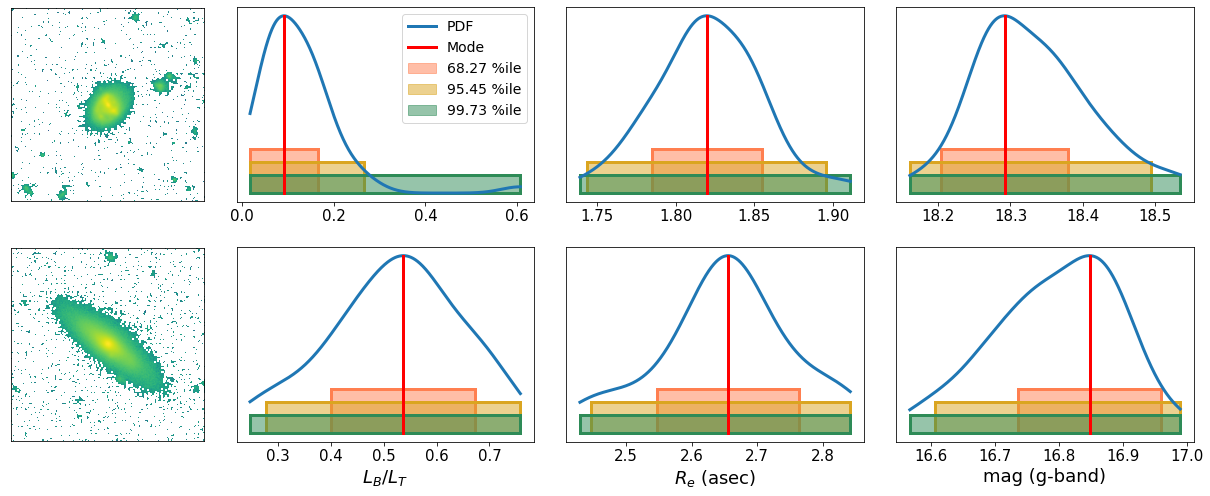

In [ ]:
plot_hists(imgdir="/content/data_lowz/cutouts/",
           summary_file_path="/content/bayesian_inference_runs_lowz/summary.csv",
           pdf_dir="/content/lowz_pdfs/",
           font_size=18)

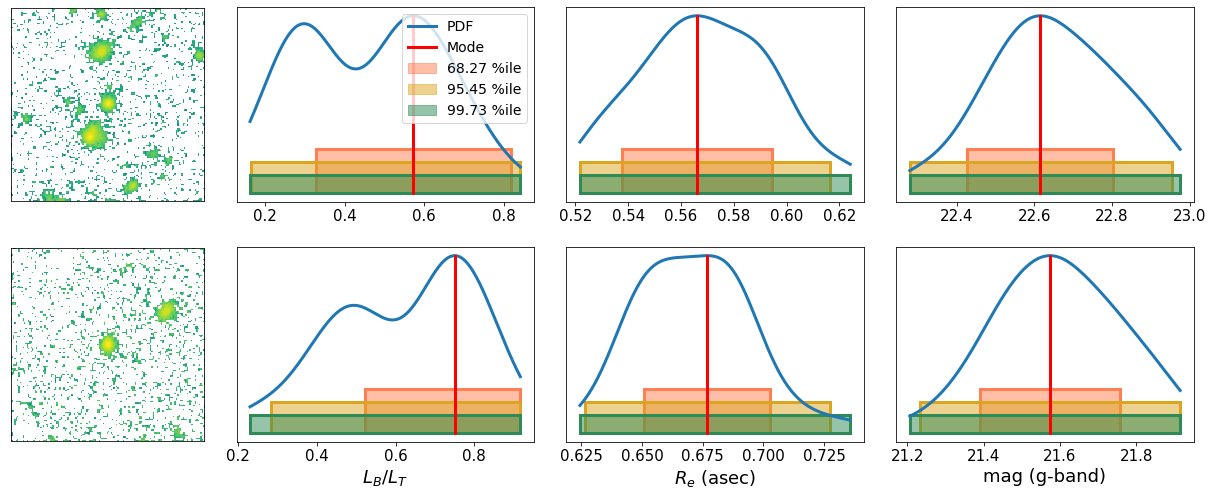

In [ ]:
plot_hists(imgdir="/content/data_midz/cutouts/",
           summary_file_path="/content/bayesian_inference_runs_midz/summary.csv",
           pdf_dir="/content/midz_pdfs/",
           font_size=18,
           cutout_size=143)

**NOTE: Some of the distributions above are multimodal and look a bit funky. This is primarily because we ran inference with 50 runs. For better results, re-run inference with 500/1000 runs!**